In [102]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
ru2380147 = pd.read_csv("pre-processed.csv")
ru2380147.drop(columns=['index'], inplace=True)
ru2380147.dropna(subset=['preprocessed_news'], inplace=True)

In [104]:
stemmer = RSLPStemmer()
stop_words = set(stopwords.words('portuguese'))

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    words = text.split()
    words = [stemmer.stem(w)for w in words if w not in stop_words and len(w) > 2]
    return " ".join(words)

ru2380147['clean_text'] = ru2380147['preprocessed_news'].apply(preprocess)

In [105]:
fake = ru2380147[ru2380147['label'] == 'fake']
real = ru2380147[ru2380147['label'] == 'true']
min_len = min(len(fake), len(real))
fake = fake.sample(n=min_len, random_state=42)
real = real.sample(n=min_len, random_state=42)

In [106]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
x_vec = vectorizer.fit_transform(ru2380147['clean_text'])
y = ru2380147['label']


In [107]:
x_train, x_test, y_train, y_test = train_test_split(x_vec, y, test_size=0.25, random_state=42, stratify=y)

In [108]:
modelo = MultinomialNB(alpha=0.5)
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

In [109]:
acc = accuracy_score(y_test, y_pred)
print("Acurácia: ", round(acc*100, 2), "%")
print(classification_report(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("RU: 2380147")

Acurácia:  86.67 %
              precision    recall  f1-score   support

        fake       0.88      0.85      0.86       900
        true       0.85      0.89      0.87       900

    accuracy                           0.87      1800
   macro avg       0.87      0.87      0.87      1800
weighted avg       0.87      0.87      0.87      1800

Confusion Matrix:  [[763 137]
 [103 797]]
RU: 2380147


In [110]:
exemplo_texto = "lula recebeu nova intimação da justiça sobre processo político"
exemplo_texto_clean = preprocess(exemplo_texto)
exemplo_vec = vectorizer.transform([exemplo_texto_clean])
pred = modelo.predict(exemplo_vec)
print(f"Predição para exemplo: {pred[0]}")

Predição para exemplo: fake


Palavras das notícias REAIS → 74419 palavras únicas


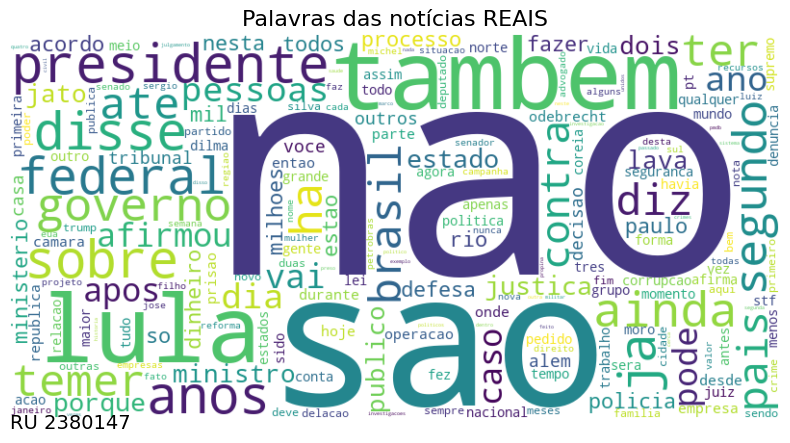

Palavras das notícias FALSAS → 31747 palavras únicas


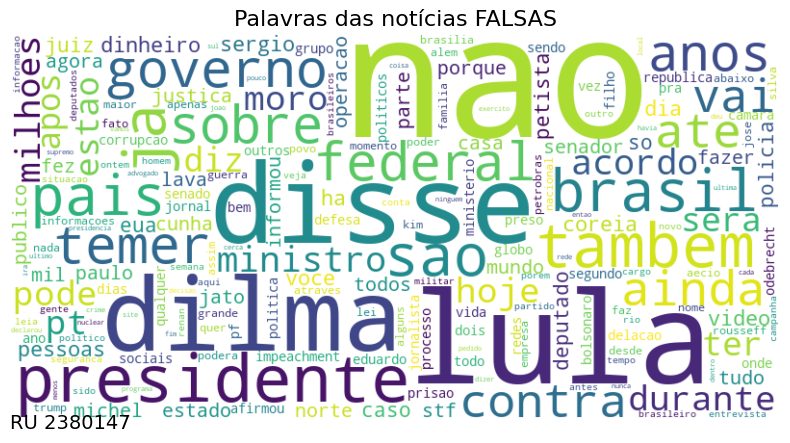

In [112]:
stop_words = stopwords.words('portuguese')
def plot_wordcloud(text, title):
    vectorizer = CountVectorizer(stop_words = stop_words)
    x = vectorizer.fit_transform([text])
    vocab = vectorizer.get_feature_names_out()

    n = len(vocab)
    print(f"{title} → {n} palavras únicas")

    counts = x.toarray().sum(axis=0)
    freq_dict = dict(zip(vocab, counts))

    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(freq_dict)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.text(0, 410, "RU 2380147", fontsize=14, color='black')
    plt.show()

# Todas as palavras fake e real
fake_text = ' '.join(ru2380147[ru2380147['label']=='fake']['preprocessed_news'])
real_text = ' '.join(ru2380147[ru2380147['label']=='true']['preprocessed_news'])

plot_wordcloud(real_text, "Palavras das notícias REAIS")

plot_wordcloud(fake_text, "Palavras das notícias FALSAS")